# Plotting microbenchmarks for SOSP

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from glob import glob
import numpy as np
import pprint
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

### Define methods

In [3]:
def load_creation_data(source_dir = '../meta/res_creation/', read_labels=True, num_node_range = [1, 5, 10], num_res_range = [10, 100, 1000]):
    data = {}
    for nodes in num_node_range:
        for res in num_res_range:
            data[str(nodes) + '_' + str(res)] = np.loadtxt(os.path.join(source_dir, "n{}_r{}.txt".format(nodes, res)))
    # Read labels:
    if read_labels:
        label_file_path = os.path.join(source_dir, "label.txt")
        with open(label_file_path, 'r') as f:
            labels = f.readline().split(",")
    return data, labels

def load_scheduling_data(source_dir = '../meta/sched_latency/', read_labels=True, num_node_range = [1, 5, 10], num_res_range = [10, 100, 1000], num_task_range=[1, 10, 100, 1000, 10000]):
    data = {}
    for nodes in num_node_range:
        for res in num_res_range:
            for task in num_task_range:
                data[str(nodes) + '_' + str(res) + '_' + str(task)] = np.loadtxt(os.path.join(source_dir, "n{}_r{}_t{}.txt".format(nodes, res, task)))
    # Read labels:
    if read_labels:
        label_file_path = os.path.join(source_dir, "label.txt")
        with open(label_file_path, 'r') as f:
            labels = f.readline().split(",")
    return data, labels

def get_stats(data):
    mean_data = {}
    stddev_data = {}
    for k,v in data.items():
        mean_data[k] = np.mean(v, axis=0)
        stddev_data[k] = np.std(v, axis=0)
    return mean_data, stddev_data


### Plotting methods

In [4]:
def plot_createres_bars(mean_data, stddev_data, num_res_range, num_node, data_idx = 2, normalize=False):
    x_pos = np.arange(len(num_res_range))
    means = [mean_data["{}_{}".format(num_node, num_res)][data_idx] for num_res in num_res_range]
    errors = [stddev_data["{}_{}".format(num_node, num_res)][data_idx] for num_res in num_res_range]

    if normalize:
        means = [means[i]/num_res_range[i] for i in range(0, len(means))]
        errors = [errors[i]/num_res_range[i] for i in range(0, len(errors))]
        
    plt.bar(x_pos, means, yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=10)
    plt.ylabel('seconds')
    plt.xlabel('Number of resources created')
    plt.xticks(x_pos, [str(i) for i in num_res_range])
    plt.title('Time taken to create resources, {} nodes'.format(num_node))

## Analysis


### Plot single node data

In [5]:
path = '../meta/res_creation/'
num_node_range=[1, 5, 10]
num_res_range=[10, 50, 100, 500, 1000]
data, labels = load_creation_data(path, num_node_range=num_node_range, num_res_range=num_res_range)

In [6]:
mean_data, stddev_data = get_stats(data)
pprint.pprint(mean_data)

{'10_10': array([0.00500592, 0.02327132, 0.04476293]),
 '10_100': array([0.09319687, 0.12141959, 0.12700844]),
 '10_1000': array([0.50186467, 0.61682669, 0.6352876 ]),
 '10_50': array([0.03010805, 0.0915029 , 0.09960389]),
 '10_500': array([0.21688652, 0.27149661, 0.27867659]),
 '1_10': array([0.00311399, 0.01915105, 0.02322125]),
 '1_100': array([0.03773093, 0.08029485, 0.08322509]),
 '1_1000': array([0.59388049, 0.65278808, 0.66731278]),
 '1_50': array([0.0162824 , 0.05463044, 0.0573825 ]),
 '1_500': array([0.2865088 , 0.32991227, 0.33702453]),
 '5_10': array([0.00724212, 0.0438656 , 0.05162589]),
 '5_100': array([0.04133813, 0.14151804, 0.16344865]),
 '5_1000': array([1.86180337, 2.18487692, 2.209457  ]),
 '5_50': array([0.02634796, 0.09650326, 0.10985867]),
 '5_500': array([0.64061038, 0.89405362, 0.92057522])}


### Fixed num of nodes, variable resources

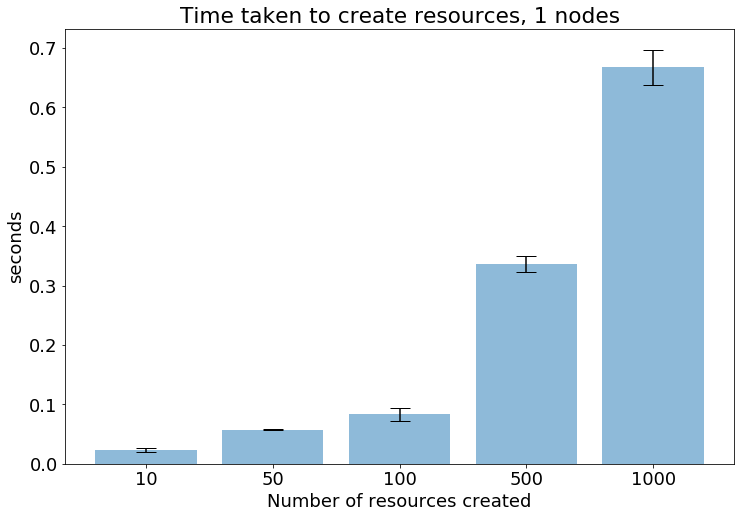

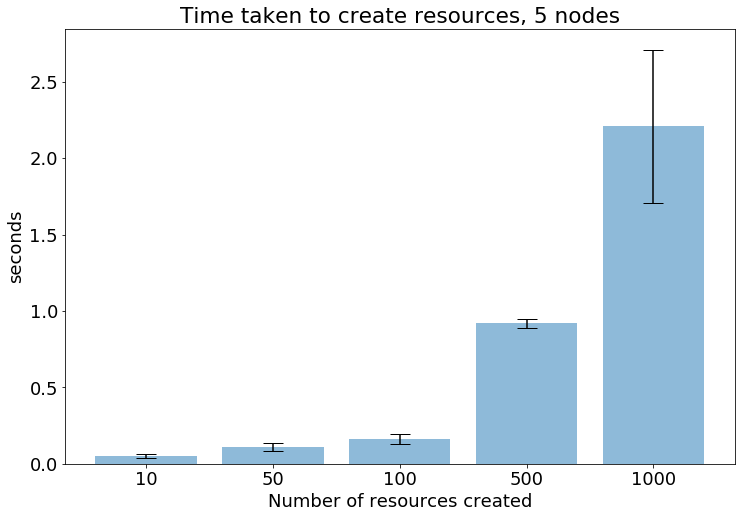

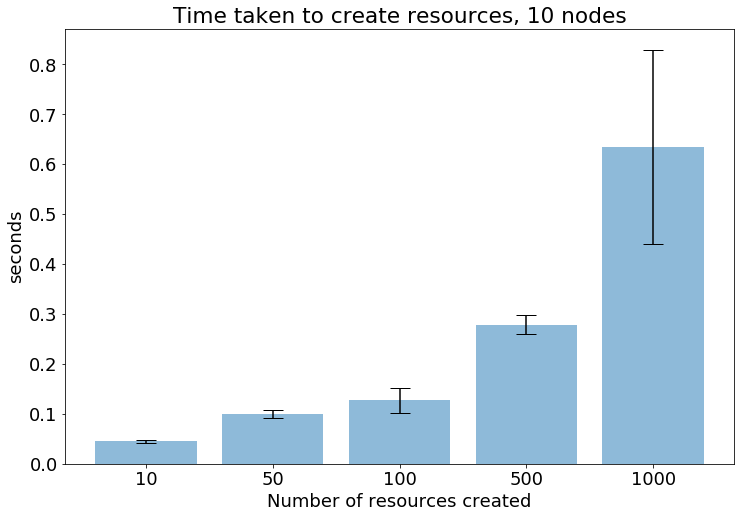

In [67]:
for num_nodes in num_node_range:
    plt.figure()
    plot_createres_bars(mean_data, stddev_data, num_res_range, num_nodes)
    

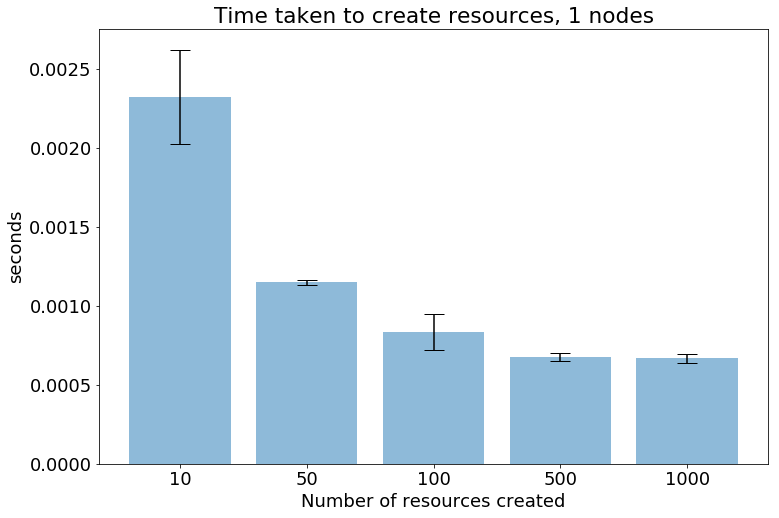

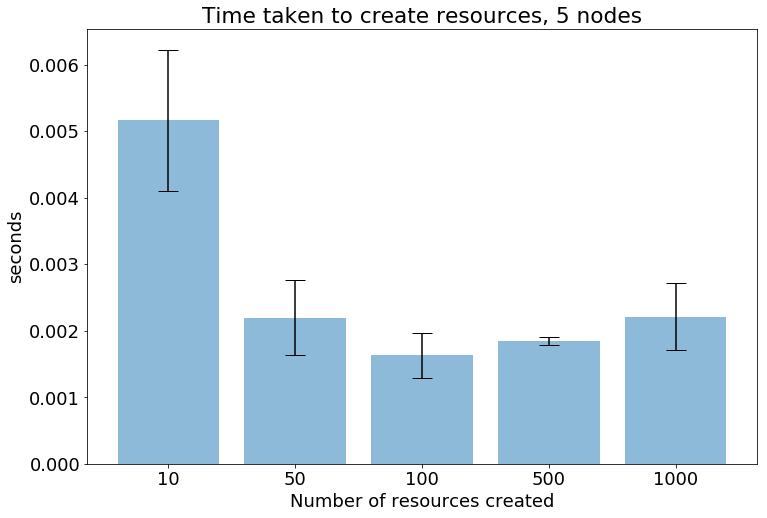

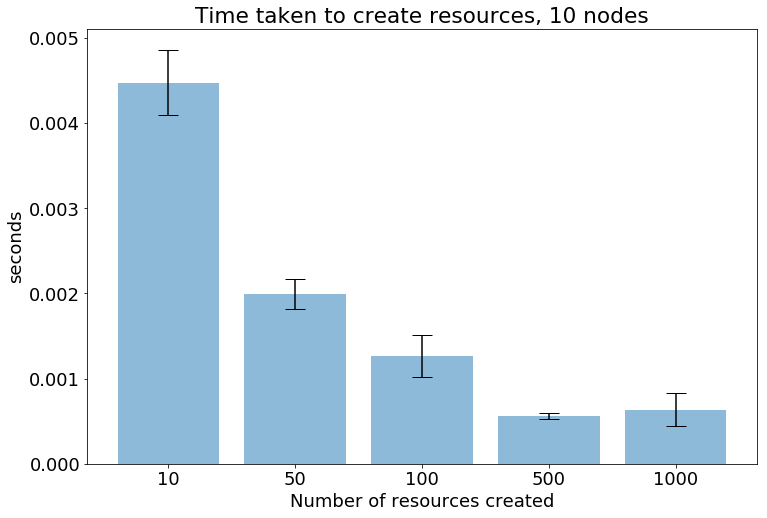

In [68]:
for num_nodes in num_node_range:
    plt.figure()
    plot_createres_bars(mean_data, stddev_data, num_res_range, num_nodes, normalize=True)
    plt.title("Mean time taken to create a resource, {} nodes".format())
    

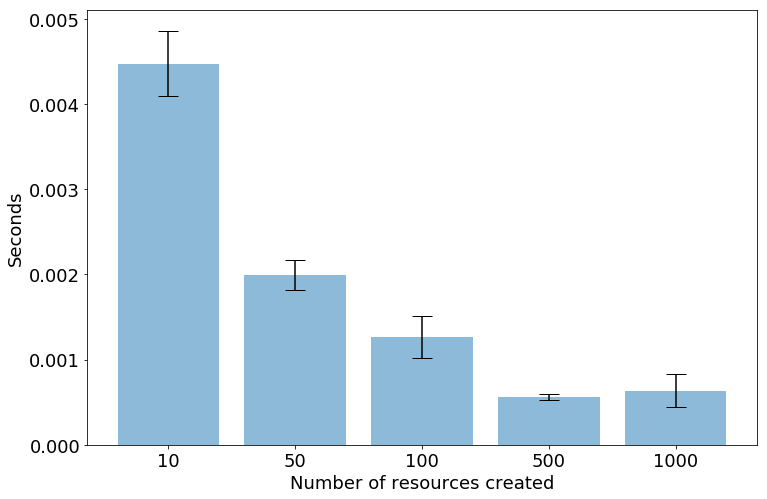

In [9]:
plot_createres_bars(mean_data, stddev_data, num_res_range, 10, normalize=True)
plt.title("")
plt.ylabel("Seconds")
plt.savefig("../eval/final_plots/result_microbench_creationlatency_vs_numres.pdf")

In [1]:
def plot_multiple_bars(mean_data, stddev_data, num_res_range, nodes_to_plot, data_idx = 2, normalize=False, 
    bar_width = 0.25):
    
    prev_xpos = None
    for num_node in nodes_to_plot:
        if not isinstance(prev_xpos, np.ndarray):
            x_pos = np.arange(len(num_res_range))
        else:
            x_pos = [x + bar_width for x in prev_xpos]
        prev_xpos = x_pos
        means = [mean_data["{}_{}".format(num_node, num_res)][data_idx] for num_res in num_res_range]
        errors = [stddev_data["{}_{}".format(num_node, num_res)][data_idx] for num_res in num_res_range]

        if normalize:
            means = [means[i]/num_res_range[i] for i in range(0, len(means))]
            errors = [errors[i]/num_res_range[i] for i in range(0, len(errors))]
    
        plt.bar(x_pos, means, yerr=errors, width=bar_width, edgecolor='white', capsize=5, label="{} Nodes".format(num_node))

    # Add xticks on the middle of the group bars
    plt.xlabel('Number of resources created')
    plt.ylabel('Seconds')
    plt.title("Time taken to create resources")
    xpos_plot = [x-(len(nodes_to_plot)*bar_width/4) for x in x_pos]
    print(x_pos)
    plt.xticks(xpos_plot, [str(i) for i in num_res_range])
    # Create legend & Show graphic
    plt.legend()

[0.25, 1.25, 2.25, 3.25, 4.25]


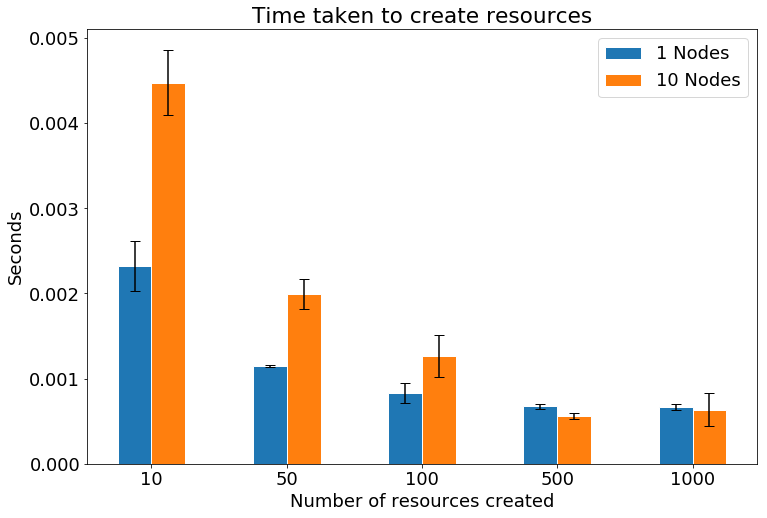

In [96]:
plot_multiple_bars(mean_data, stddev_data, num_res_range, nodes_to_plot=[1,10], normalize=True)